In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Statistical learning

It can be divided into two categories:
-  Supervised learning : Given both input and output, learn to associate input with output
-  Unsupervised learning : Given input only, learn relationships and structure from data

## Supervised learning

Using Scikit learning 
-  Regression (problems with continuous outputs)
-  Classification (problems with categorical outputs)

In both problems, we have some input variable X and an output variable Y,
and we seek some function f of X for predicting Y, given values of the input
X. What the best prediction is depends on the so-called loss function,
which is a way of quantifying how far our predictions for Y for a given
value of X are from the true observed values of Y. 

Most common used loss of function
Regression --> squared error loss (the best value to predict for a given X
is a conditional expectation, or a conditional average, of Y given X i.e. we should predict
is the average of all values of Y that correspond to a given value of X)
Classification --> 0-1 loss function (the best classification for a given X is obtained
by classifying observation of the class with the highest
conditional probability given X i.e. for a given value of X,
we compute the probability of each class and we then
assign the observation to the class with the highest probability.)

## Linear regression

### Generating example regression data

In [20]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

n = 100 # 100 fake data points
beta_0  = 5
beta_1 = 2

np.random.seed(1)

# input data points x
x = 10 * ss.uniform.rvs(size=n) # rvs generates random variables distributed on the 0-1 interval. Since we want our variable x to be distributed between 0 - 10, we simply multipy out put of rvs by 10

# outcome data points y
y = beta_0 + beta_0 * x + ss.norm.rvs(loc=0, scale=1, size=n) # ss.norm.rvs adds random noise with mean =0

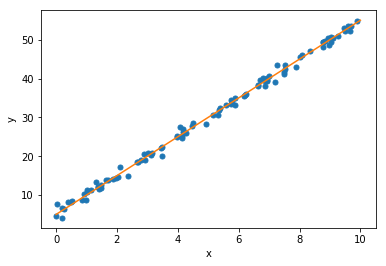

In [21]:
plt.figure()

# plot regression function

plt.plot(x,y,"o", ms=5)

# plot deterministic part of the model i.e. part of the model that doesn't involve any error
xx = np.array([0,10])
plt.plot(xx, beta_0 + beta_0 * xx)
plt.xlabel("x")
plt.ylabel("y");

In the plot above, we have the x values here going from 0 to 10.
We have the y values going from about 5 to 25.
And the orange line, the straight line here,
is the function that we used to generate the data from.
The blue dots here correspond to realizations from this model.
So what we did was we first sampled 100 points from the interval 0 to 10.
Then we computed the corresponding y values.
And then we added a little bit of normally distributed
or Gaussian noise all of those points.
And that's why the points are being scattered around the line.

#### Comprehension check

What is the approximate mean of x and y , respectively?

For this problem, you can use np.mean() to find the mean.

In [22]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n) 

np.mean(x)
np.mean(y)

4.8587792760014565

14.80142786070299

## Simple linear regression

In simple linear regression, the goal
is to predict a quantitative response Y on the basis of a single predictor
variable X. It assumes the following relationship between the random
variables X and Y.

Our random variable, Y, is going to be given to us by some
parameter beta 0 plus some other parameter-- let's call it beta 1--
times a random variable X plus epsilon, which is some error term.

**Note** the capital letters here always correspond to random variables.

\begin{equation*}
Y = \beta_0 + \beta_1 X + \epsilon \\
Y = random variable \\
\beta_0 \ and \ \beta_1 = parameters \\
X = random variable \\
\epsilon = error term \\
\end{equation*}


Once we have used training data to produce estimates,
beta 0 hat and beta 1 hat, for the model coefficients,
we can predict future values of Y.

y hat (see equation below) indicates
a prediction, or a specific value, of the random variable Y
on the basis of a specific value where X (the uppercase X)
is equal to a lowercase x.

\begin{equation*}
\widehat {y} = \widehat {\beta_0} + \widehat {\beta_1} x \\
\widehat {y} = predicted value \\
\widehat {\beta_0} \ and \ \widehat {\beta_1} = parameter \ estimates \ i.e. \ parameters \ estimated \ using \ data \\
x= random variable \\
\end{equation*}

To estimate the unknown coefficients in the model, we must use data.
Let's say that our data consists of n observation
pairs, where each pair consists of a measurement of x
and a measurement of y.
We can write these n observations i.e. observed data,  as follows.

\begin{equation*}
(x_1,y_1) \ , (x_2,y_2) \ .... \ (x_n,y_n) \\
\end{equation*}

The most common approach to estimating the model parameters
involves minimizing the least squares criterion.
We first define the i-th residual as follows.
We typically use lowercase e for the residual.

\begin{equation*}
e_i = y_i + \widehat {y_i} \\
e_i = residual \ for \ the \ i^{th} \ observation \\
y_i \ = \ data \ point \\
\widehat y_i = predicted \ value \ for \ data \ point \ y_i \\
\end{equation*}

So e sub i here is the difference between the i-th
observed response value and the i-th response value predicted by the model.

From this, we can define the residual sum of squares, RSS, as follows.

\begin{equation*}
RSS = e_1^2 + e_2^2 .... + \ e_n^2 \\ 
\end{equation*}

The least squares estimates of beta 0 and beta 1 are those values of beta 0
and beta 1 that minimize the RSS criterion.

#### Comprehension check

The following code implements the residual sum of squares for this regression problem:

```
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
```

Using the data from CC 5.1.2 , run the code above. What is the approximate value of rss ?


In [23]:
import numpy as np
import scipy.stats as ss

def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x

n = 100
beta_0 = 5
beta_1 = 2 
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n) 
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
rss

81.540007425512

## Least square estimation in code

In [24]:
import numpy as np
rss = []
slopes = np.arange(-10,15,0.01)

for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))

#rss

In [25]:
ind_min = np.argmin(rss)
ind_min
print("Estimate for the slope: ", slopes[ind_min])

1200

Estimate for the slope:  1.9999999999997442


**NOTE** : The estimated value of the parameter (2.0) coincides with the true value of the parameter. Generally, we do not know the underlying true value, but here it is known to us because we generated the data ourselves. In practical settings, the estimated parameter value may not always match the true value.

Lets the visualize the results

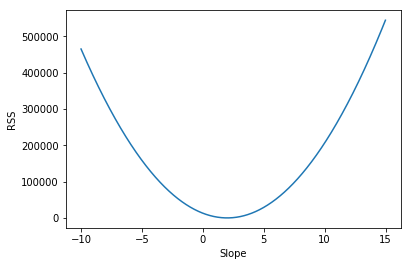

In [26]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS");

Here in the figure on the x-axis, we have the different slopes
that we tried out from minus 10 to plus 15.
On the y-axis, we have the different rss values.
And remember, the goal is to find the value
of slope, the value of the parameter that
gives us the smallest value for RSS.
And looking at the plot, it looks like it happens at around 2.

#### Comprehension check

Is the best estimate for the slope exactly the same as the true value 2? Rerun the code in the video, but use a finer grid for the search by specifying `slopes = np.arange(-10, 15, 0.001)`

In [27]:
import numpy as np
rss = []
slopes = np.arange(-10, 15, 0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))
    ind_min = np.argmin(rss)
ind_min
print("Estimate for the slope: ", slopes[ind_min])

12004

Estimate for the slope:  2.003999999993347


## Simple Linear Regression in Code